<a href="https://colab.research.google.com/github/fpinell/hands_on_python_for_ds/blob/main/Lecture_4_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands on Python for Data Science


### Master II Livello - Data Science and Statistical Learning (MD2SL) 2020-2021

#### Fabio Pinelli
<a href="mailto:fabio.pinelli@imtlucca.it">fabio.pinelli@imtlucca.it</a><br/>
IMT School for Advanced Studies Lucca<br/>
2020/2021<br/>
June, 26 2021

# Outline

- Pytorch
- Neural Network (fully connected)
- CNN
- RNN


# Pytorch 

## Why ```pytorch```?



In [27]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# pytorch is available naturally on colab
# we can also use a gpu
# Go to Menu > Runtime > Change runtime.


import torch
# GPU available check 
print('GPU available check {}'.format(torch.cuda.is_available()))
print(torch.rand(2,2))

GPU available check True
tensor([[0.4586, 0.1364],
        [0.5737, 0.8939]])


## Tensors 

- A tensor is both a container for **numbers** and for a set of rules that define transformations between tensors producing a new tensor

- **Essentially?** A multidimensional array
- Every tensor has a rank
  - scalar --> rank 0 
  - array --> rank 1
  - $n \times n$ matrix --> rank 2

```python torch.rand(2,2)``` creates a rank 2 tensor with random values by using ```python torch.rand()``` 



### Operations with tensors

In [3]:
# we can create a tensor from lists
x = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print(x)

tensor([[0, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


In [4]:
# we can change an element in a tensor by using standard Python indexing

x[0][0] = 5
print(x) 

tensor([[5, 0, 1],
        [1, 1, 1],
        [0, 0, 0]])


We can use special creation functions to generate particular types of tensors

- ```ones()``` generates tensors filled with 1s
- ```zeros()```  generates tensors filled with 1s

In [6]:
a = torch.zeros(2,2)
b = torch.ones(2,2)
print('First tensor\n {}'.format(a))
print('Second tensor\n {}'.format(b))

First tensor
 tensor([[0., 0.],
        [0., 0.]])
Second tensor
 tensor([[1., 1.],
        [1., 1.]])


We can perform standard mathematical operations with tensors, e.g. addind two tensors toegheter. 



In [9]:
a = torch.tensor([[1,2],[2,3]])
b = torch.tensor([[1,1],[1,1]])
print('Check the sum\n {}'.format(a+b))

Check the sum
 tensor([[2, 3],
        [3, 4]])


And if you have a tensor of rank 0, you can access out the value with the ```item()``` function

In [11]:
print('Value of the 1D tensor: {}'.format(torch.rand(1).item()))

Value of the 1D tensor: 0.20457309484481812


Tensors can live in the **CPU** or on the **GPU** and they can be copied between devices by usint the ```to()``` function:

In [14]:
cpu_tensor = torch.rand(2)
print('In which device is the tensor? {}'.format(cpu_tensor.device))

In which device is the tensor? cpu


In [16]:
gpu_tensor = cpu_tensor.to('cuda')
print('In which device is the tensor? {}'.format(gpu_tensor.device))

In which device is the tensor? cuda:0


Quite often we need to find the maximum item in a tensor, as well as the index that contains the maximum value (it may correspond to the class that the neural network has decided upon its final prediction). 

```max()``` and ```argmax()``` are the needed functions, then we can use ```item()``` to get the _standard_ Python value from a 1D tensor. 

In [17]:
a = torch.rand(2,2)
print(a)

print('Which is the max value? {}'.format(a.max()))
print('Which is the index of the max value: {}'.format(a.argmax()))
print('Get the values\n -max: {}\n -index: {}'.format(a.max().item(),a.argmax().item()))

tensor([[0.5648, 0.0464],
        [0.4002, 0.2061]])
Which is the max value? 0.5647860765457153
Which is the index of the max value: 0
Get the values
 -max: 0.5647860765457153
 -index: 0


Sometimes we need to change the type of a tensor

In [18]:
long_tensor = torch.tensor([[0,0,1],[1,1,1],[0,0,0]])
print('which is the type of long tensor? {}'.format(long_tensor.type()))

which is the type of long tensor? torch.LongTensor


In [22]:
float_tensor = long_tensor.to(dtype=torch.float32)
float_tensor_2 = long_tensor.type(torch.float64) #second method to change type
print('which is the type of long tensor? {}'.format(float_tensor.type()))
print('which is the type of long tensor? {}'.format(float_tensor_2.type()))

which is the type of long tensor? torch.FloatTensor
which is the type of long tensor? torch.DoubleTensor


If you remember in ```pandas``` we could perform operations of dataframes using the parameter ```in_place = True```. 

We could perform something similar on tensors. 

Functions can be applied _inplace_ if exists the original fuction with appended underscore '_'. 

Let see an example:

In [24]:
random_tensor = torch.rand(2,2)
new_random = random_tensor.log2()
print(random_tensor)
print(new_random)

tensor([[0.3557, 0.3829],
        [0.5760, 0.5341]])
tensor([[-1.4913, -1.3850],
        [-0.7957, -0.9048]])


In [25]:
print(random_tensor.log2_())

tensor([[-1.4913, -1.3850],
        [-0.7957, -0.9048]])


Some nice manipulation that can be done with tensors
- reshape / view
- column permutation
- slice a tensor

Let's try with a simple random tensor, and with the ```MINST``` dataset that is represented in numpy arrays of 784 elements

In [43]:
'''
reshape() function. It is really similar to numpy reshape function. There are a
lot of similarities between tensors and numpy operations/functions
'''

flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.reshape(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))

'''
view() function. Same behaviour of reshape, the main difference is that the view 
changes if the original one is changed
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(1,28,28) #1 is the number of channels
print('Flat tensor shape {}'.format(flat_tensor.shape))
print('Flat tensor shape {}'.format(reshaped_tensor.shape))

'''
The reshaped tensor can't have a number of elements different than the original one
'''
flat_tensor = torch.rand(784)
reshaped_tensor = flat_tensor.view(3,28,28)



Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])
Flat tensor shape torch.Size([784])
Flat tensor shape torch.Size([1, 28, 28])


RuntimeError: ignored

In [28]:

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [30]:
print('shape of x train: {}'.format(X_train.shape))

shape of x train: (60000, 784)


In [33]:
'''
Let's create a tensor from the numpy arrays
'''
x_train_tensor, y_train_tensor ,x_test_tensor , y_test_tensor = map(torch.tensor, (X_train, y_train, X_test, y_test))


In [61]:
print(x_train_tensor.shape,x_train_tensor.size())
x_train_tensor_reshaped = x_train_tensor.reshape([-1,28,28])

print(x_train_tensor_reshaped.size())


torch.Size([60000, 784]) torch.Size([60000, 784])
torch.Size([60000, 28, 28])


Dimensions permutations. The order of the "columns" is not the one useful for our tasks so we need to change the order. 
For instance, images are stored as ```[height, width, channel]``` tensors, but PyTorch prefers to dela with these in a ```[channel, height, width ]```

```
permute() 
```

In [44]:
hwc_tensor = torch.rand(643,232,9)
chw_tensor = hwc_tensor.permute(2,0,1)
print('Shape of hwc tensor {}',hwc_tensor.shape)
print('Shape of chw tensor {}',chw_tensor.shape)

Shape of hwc tensor {} torch.Size([643, 232, 9])
Shape of chw tensor {} torch.Size([9, 643, 232])


Slice on tensors to access certain elements of the data structrure

In [58]:
selected_part[num_index].shape

torch.Size([1, 10, 28])

the shape is torch.Size([60000, 28, 28])
the shape of the cropped tensor is torch.Size([60000, 10, 28])


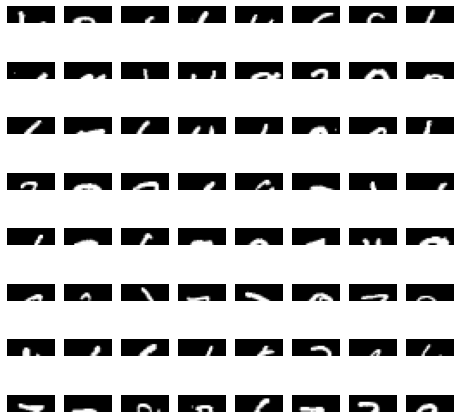

In [64]:
'''
Take the ten first lines for all the images
'''

print('the shape is {}'.format(x_train_tensor_reshaped.size()))

selected_part = x_train_tensor_reshaped[:,:10,:]

print('the shape of the cropped tensor is {}'.format(selected_part.size()))

fig, axes = plt.subplots(8,8,figsize=(8,8))
for i in range(8):
    for j in range(8):
        num_index = np.random.randint(len(selected_part))
        axes[i,j].imshow(selected_part[num_index].numpy(), cmap="gray")
        axes[i,j].axis("off")
plt.show() 

# Our first Neural Network

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from PIL import Image, ImageFile


ImageFile.LOAD_TRUNCATED_IMAGES=True

In [6]:
def check_image(path):
    try:
        im = Image.open(path)
        return True
    except:
        return False

In [7]:
img_transforms = transforms.Compose([
    transforms.Resize((64,64)),    
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225] )
    ])



In [ ]:
torchvision.datasets.ImageFolder

In [11]:
train_data_path = "/content/drive/Shareddrives/MD2SL-material/data/"
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=img_transforms, is_valid_file=check_image)

FileNotFoundError: ignored

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
